[View in Colaboratory](https://colab.research.google.com/github/starman3ch/kaggle-competitions-play-level/blob/master/House_Prices_Advanced_Regression_Techniques.ipynb)

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks/datasets/house prices"

test.csv  train.csv


In [0]:
TRAIN_CSV = '/content/drive/My Drive/Colab Notebooks/datasets/house prices/train.csv'
# TEST_CSV = '/content/drive/My Drive/Colab Notebooks/datasets/house prices/test.csv'

##Getting Started

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
data = pd.read_csv(TRAIN_CSV)

In [0]:
# No need Id feature
data.drop('Id', axis=1, inplace=True)

##Data Exploration

In [0]:
data.shape

(1460, 80)

In [0]:
data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [0]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
price = data['SalePrice']

price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Prices Skewness: 1.882876
Prices Kurtosis: 6.536282


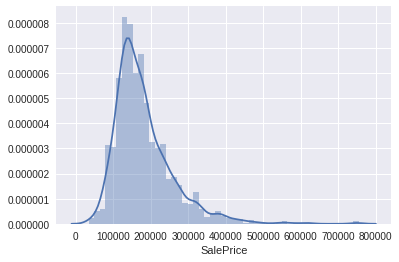

In [0]:
sns.distplot(price)
print("Prices Skewness: {:.6f}".format(price.skew()))
print("Prices Kurtosis: {:.6f}".format(price.kurt()))

Prices Log Skewness: 0.121347
Prices Log Kurtosis: 0.809519


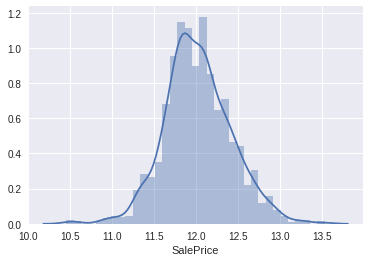

In [0]:
price_log = np.log1p(price)
sns.distplot(price_log)
print("Prices Log Skewness: {:.6f}".format(price_log.skew()))
print("Prices Log Kurtosis: {:.6f}".format(price_log.kurt()))

####Numerical and Categorical features

In [0]:
numerical_feats = data.dtypes[data.dtypes != "object"]

categorical_feats = data.dtypes[data.dtypes == "object"]

In [0]:
print("Number of Numerical features: {}".format(len(numerical_feats)))
numerical_feats.index

Number of Numerical features: 37


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [0]:
print("Number of Categorical featues: {}".format(len(categorical_feats)))
categorical_feats.index

Number of Categorical featues: 43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [0]:
data[numerical_feats.index].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [0]:
data[categorical_feats.index].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


####Dealing with Outliers

http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt
<br>이 문서에 보면 datasets에 outliers가 있음을 알 수 있다.

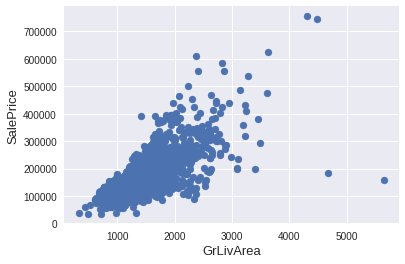

In [0]:
fig, ax = plt.subplots()
ax.scatter(x = data['GrLivArea'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [0]:
# Removing outliers
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)

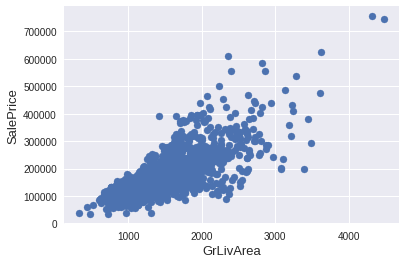

In [0]:
fig, ax = plt.subplots()
ax.scatter(x = data['GrLivArea'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

####List of features with missing values

In [0]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Percent missing data by feature')

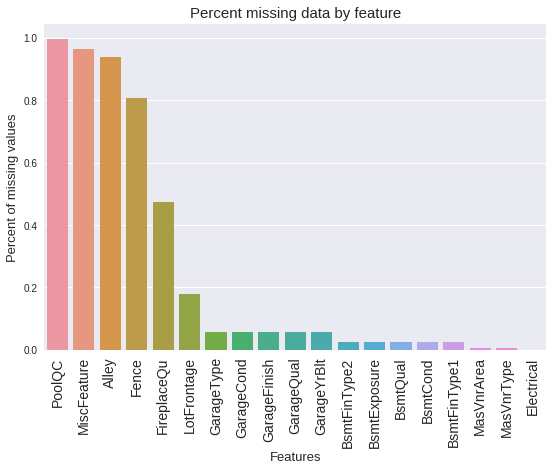

In [0]:
percent_with_na = percent[percent > 0]

fig, ax = plt.subplots(figsize=(9, 6))
plt.xticks(rotation='90', fontsize=14)
sns.barplot(x=percent_with_na.index, y=percent_with_na)
plt.xlabel('Features', fontsize=13)
plt.ylabel('Percent of missing values', fontsize=13)
plt.title('Percent missing data by feature', fontsize=15)

In [0]:
# Filling Missing values
cols_to_fillna_with_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 
                            'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'MasVnrType', 'Electrical']
cols_to_fillna_with_mean = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

for col in cols_to_fillna_with_none:
  data[col].fillna('None', inplace=True)
  
for col in cols_to_fillna_with_mean:
  data[col].fillna(data[col].mean(), inplace=True)

####Log transform

In [0]:
dic = {}
# sorted_by_value = sorted(x.items(), key=lambda kv: kv[1])
for col in numerical_feats.index:
  dic[col] = round(data[col].skew(), 4)
  
sorted_v = sorted(dic.items(), key=lambda kv: kv[1], reverse=True)

print(sorted_v)

[('MiscVal', 24.4601), ('PoolArea', 15.9489), ('LotArea', 12.5739), ('3SsnPorch', 10.2971), ('LowQualFinSF', 9.005), ('KitchenAbvGr', 4.4849), ('BsmtFinSF2', 4.2519), ('ScreenPorch', 4.1189), ('BsmtHalfBath', 4.1001), ('EnclosedPorch', 3.0872), ('MasVnrArea', 2.6952), ('OpenPorchSF', 2.3398), ('SalePrice', 1.8813), ('LotFrontage', 1.7012), ('WoodDeckSF', 1.5458), ('MSSubClass', 1.407), ('GrLivArea', 1.011), ('BsmtUnfSF', 0.9209), ('1stFlrSF', 0.8876), ('2ndFlrSF', 0.813), ('BsmtFinSF1', 0.7648), ('OverallCond', 0.691), ('HalfBath', 0.6801), ('TotRmsAbvGrd', 0.6605), ('Fireplaces', 0.6321), ('BsmtFullBath', 0.5904), ('TotalBsmtSF', 0.5117), ('MoSold', 0.2154), ('BedroomAbvGr', 0.2123), ('OverallQual', 0.2008), ('GarageArea', 0.1317), ('YrSold', 0.0954), ('FullBath', 0.0313), ('GarageCars', -0.3424), ('YearRemodAdd', -0.5018), ('YearBuilt', -0.6123), ('GarageYrBlt', -0.6669)]


In [0]:
cols_with_high_skewness= []
for col in numerical_feats.index:
  print(col)
  print("Skewness: %f" % data[col].skew())
  print("Kurtosis: %f" % data[col].kurt())
  print("-"*15)
  if data[col].skew() > 1:
    cols_with_high_skewness.append(col)

MSSubClass
Skewness: 1.407011
Kurtosis: 1.574553
---------------
LotFrontage
Skewness: 1.701181
Kurtosis: 14.657964
---------------
LotArea
Skewness: 12.573925
Kurtosis: 213.590680
---------------
OverallQual
Skewness: 0.200786
Kurtosis: 0.074960
---------------
OverallCond
Skewness: 0.691035
Kurtosis: 1.101740
---------------
YearBuilt
Skewness: -0.612295
Kurtosis: -0.439826
---------------
YearRemodAdd
Skewness: -0.501838
Kurtosis: -1.273920
---------------
MasVnrArea
Skewness: 2.695173
Kurtosis: 10.431754
---------------
BsmtFinSF1
Skewness: 0.764789
Kurtosis: -0.112098
---------------
BsmtFinSF2
Skewness: 4.251925
Kurtosis: 20.080289
---------------
BsmtUnfSF
Skewness: 0.920903
Kurtosis: 0.473872
---------------
TotalBsmtSF
Skewness: 0.511703
Kurtosis: 1.770105
---------------
1stFlrSF
Skewness: 0.887637
Kurtosis: 1.117385
---------------
2ndFlrSF
Skewness: 0.812957
Kurtosis: -0.557022
---------------
LowQualFinSF
Skewness: 9.004955
Kurtosis: 83.114539
---------------
GrLivArea
Ske

In [0]:
# Features which have high skewness
print(len(cols_with_high_skewness))
print(cols_with_high_skewness)

17
['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


Skewness of LowQualFinSF: 9.0050


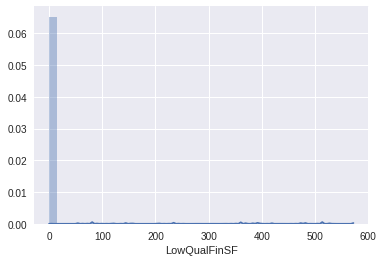

In [0]:
# Skewness 그래프를 보기 위한 셀
col_for_explore = 'LowQualFinSF'
sns.distplot(data[col_for_explore]);
#skewness and kurtosis
# print("Skewness: %f" % data[col_for_explore].skew())
# print("Kurtosis: %f" % data[col_for_explore].kurt())
print("Skewness of {}: {:.4f}".format(col_for_explore, data[col_for_explore].skew()))

Skewness of GarageArea: 0.1317


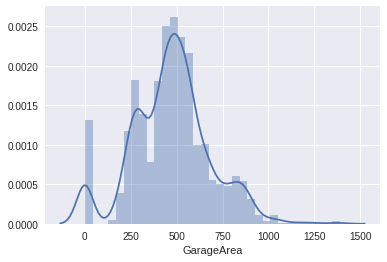

In [0]:
# Skewness 그래프를 보기 위한 셀
col_for_explore = 'GarageArea'
sns.distplot(data[col_for_explore]);
#skewness and kurtosis
# print("Skewness: %f" % data[col_for_explore].skew())
# print("Kurtosis: %f" % data[col_for_explore].kurt())
print("Skewness of {}: {:.4f}".format(col_for_explore, data[col_for_explore].skew()))

In [0]:
# Logarithmic Transformation (여기서 target feature 도 Log Transform 됨.)
cols_to_log_transform = cols_with_high_skewness

for col in cols_to_log_transform:
#   data[col+'_Log'] = np.log1p(data[col])
#   data.drop(col, axis=1, inplace=True)
  data[col] = np.log1p(data[col])

####Data Correlation

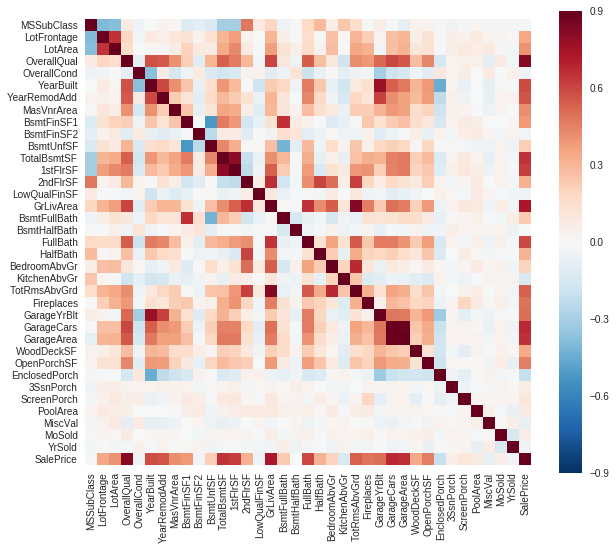

In [0]:
#Correlation map to see how features are correlated with SalePrice
corrmat = data.corr()
plt.subplots(figsize=(10,8.5))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [0]:
corr_abs=data.corr()["SalePrice"].abs()
corr_abs[np.argsort(corr_abs, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.821405
GrLivArea        0.737431
GarageCars       0.681033
GarageArea       0.656129
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500972
Fireplaces       0.491998
OpenPorchSF      0.460623
MasVnrArea       0.421006
LotArea          0.402820
BsmtFinSF1       0.392283
LotFrontage      0.349952
WoodDeckSF       0.343225
2ndFlrSF         0.319953
HalfBath         0.314186
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209035
EnclosedPorch    0.207249
KitchenAbvGr     0.144264
ScreenPorch      0.105897
PoolArea         0.076269
MiscVal          0.067037
3SsnPorch        0.058843
MoSold           0.057064
LowQualFinSF     0.054501
YrSold           0.037151
OverallCond      0.036821
BsmtFinSF2       0.030327
MSSubClass       0.020327
BsmtHalfBath     0.004865
Name: SalePrice, dtype: float64

In [0]:
corr_abs=data.corr()["SalePrice"].abs()
tmp = corr_abs[np.argsort(corr_abs, axis=0)[::-1]]

In [0]:
list(zip(tmp.index, round(tmp, 4)))

[('SalePrice', 1.0),
 ('OverallQual', 0.8214),
 ('GrLivArea', 0.7374),
 ('GarageCars', 0.681),
 ('GarageArea', 0.6561),
 ('TotalBsmtSF', 0.6476),
 ('1stFlrSF', 0.6205),
 ('FullBath', 0.5959),
 ('YearBuilt', 0.587),
 ('YearRemodAdd', 0.566),
 ('TotRmsAbvGrd', 0.5377),
 ('GarageYrBlt', 0.501),
 ('Fireplaces', 0.492),
 ('OpenPorchSF', 0.4606),
 ('MasVnrArea', 0.421),
 ('LotArea', 0.4028),
 ('BsmtFinSF1', 0.3923),
 ('LotFrontage', 0.35),
 ('WoodDeckSF', 0.3432),
 ('2ndFlrSF', 0.32),
 ('HalfBath', 0.3142),
 ('BsmtFullBath', 0.2371),
 ('BsmtUnfSF', 0.2219),
 ('BedroomAbvGr', 0.209),
 ('EnclosedPorch', 0.2072),
 ('KitchenAbvGr', 0.1443),
 ('ScreenPorch', 0.1059),
 ('PoolArea', 0.0763),
 ('MiscVal', 0.067),
 ('3SsnPorch', 0.0588),
 ('MoSold', 0.0571),
 ('LowQualFinSF', 0.0545),
 ('YrSold', 0.0372),
 ('OverallCond', 0.0368),
 ('BsmtFinSF2', 0.0303),
 ('MSSubClass', 0.0203),
 ('BsmtHalfBath', 0.0049)]

####Find columns with strong correlation to target

In [0]:
min_val_corr = 0.4

cols_above_corr_limit = list(corr_abs[corr_abs.values > min_val_corr].index)
cols_below_corr_limit = list(corr_abs[corr_abs.values <= min_val_corr].index)

####Drop all columns with only small correlation to Target

In [0]:
# Dropping columns with small correlation to target variable
data.drop(cols_below_corr_limit, axis=1, inplace=True)

In [0]:
data.columns

Index(['MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'OpenPorchSF', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

####Get Dummies

In [0]:
# Getting dummy categorical features
dummy_data = pd.get_dummies(data)

##Data wrangling

##Developing a Model

In [0]:
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [0]:
from sklearn.metrics import mean_squared_error, make_scorer

def performance_metric(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))


# scorer = make_scorer(mean_squared_error, greater_is_better = False)

# def performance_metric(model, X_train, y_train, scorer):
#   rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring=scorer, cv=10))
#   return rmse

In [0]:
from sklearn.cross_validation import train_test_split

features = dummy_data.drop('SalePrice', axis=1)
prices = dummy_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.25, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
def default_model_score(regressor):
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  
  return performance_metric(y_test, y_pred)

####Benchmark Model

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
default_model_score(lr)

0.13267325726118548

####Default Models

In [0]:
from sklearn.linear_model import Ridge

r = Ridge()
default_model_score(r)

0.12421798468043838

In [0]:
from sklearn.linear_model import Lasso

l = Lasso()
default_model_score(l)

0.2335378992517102

In [0]:
from sklearn.linear_model import ElasticNet

en = ElasticNet()
default_model_score(en)

0.2290591416107782

In [0]:
from sklearn.kernel_ridge import KernelRidge

kr = KernelRidge()
default_model_score(kr)

0.1250752705275133

In [0]:
# from sklearn.linear_model import SGDRegressor

# sr = SGDRegressor()
# default_model_score(sr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


8974870959715356.0

In [0]:
from sklearn.svm import SVR

svr = SVR()
default_model_score(svr)

0.3828577839342406

In [0]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
default_model_score(dtr)

0.22651029695320735

In [0]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
default_model_score(rfr)

0.14795604082422023

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
default_model_score(gbr)

0.12672833316721926

In [0]:
import xgboost as xgb

xr = xgb.XGBRegressor()
default_model_score(xr)

0.12765489665833193

In [0]:
# import lightgbm as lgb

# lgbr = lgb.LGBMRegressor()
# default_model_score(lgbr)

####Grid Search Models

In [0]:
from sklearn.model_selection import GridSearchCV

nr_cv = 5
score_calc = 'neg_mean_squared_error'

In [0]:
def get_best_score(grid):
  best_score = np.sqrt(-grid.best_score_)
  print(best_score)    
  print(grid.best_params_)
  print(grid.best_estimator_)
  return best_score

In [0]:
def cv_model_score(regressor, params, verbose=1):
  grid_cv = GridSearchCV(regressor, params, cv=nr_cv, verbose=verbose, scoring=score_calc)
  grid_cv.fit(X_train, y_train)
  return get_best_score(grid_cv)

In [0]:
lr = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
cv_model_score(lr, parameters)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.13482320989084176
{'copy_X': True, 'fit_intercept': False, 'normalize': True}
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    5.2s finished


0.13482320989084176

In [0]:
r = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
# RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
cv_model_score(r, parameters)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.12454128316129799
{'alpha': 1, 'normalize': False, 'tol': 1e-06}
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=1e-06)


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    9.7s finished


0.12454128316129799

In [0]:
l = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
#LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1], max_iter = 50000, cv = 10)
cv_model_score(l, parameters)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.12179121844969365
{'alpha': 0.001, 'normalize': False, 'tol': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.001, warm_start=False)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    6.8s finished


0.12179121844969365

In [0]:
en = ElasticNet()
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}
cv_model_score(en, parameters)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.14380302142128623
{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.04, 'max_iter': 1000000, 'normalize': False, 'tol': 0.01}
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.04,
      max_iter=1000000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.01, warm_start=False)


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  4.4min finished


0.14380302142128623

In [0]:
# sr = SGDRegressor()
# parameters = {'max_iter' :[10000], 'alpha':[1e-06,1e-05], 'epsilon':[1e-03,1e-02], 'fit_intercept' : [True]  }
# cv_model_score(sr, parameters)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.9min finished


1535177601844466.0
{'alpha': 1e-05, 'epsilon': 0.001, 'fit_intercept': True, 'max_iter': 10000}
SGDRegressor(alpha=1e-05, average=False, epsilon=0.001, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)


1535177601844466.0

In [0]:
svr = SVR()
parameters = {'C': [100000,300000,400000,500000,600000,800000], 'gamma': [0.1, 0.07, 0.05, 0.04, 0.03, 0.02, 0.01, 0.007,0.005], 'kernel': ['rbf']}
cv_model_score(svr, parameters)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.1min finished


0.38752173582301414
{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}
SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.005,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


0.38752173582301414

In [0]:
dr = DecisionTreeRegressor()
parameters = { 'max_depth' : [None, 6,7,8] , 'max_features' : [None,10,11,12,14] ,
               'max_leaf_nodes' : [None, 8,10,12,15] ,'min_samples_split' : [15,20,25,30]}
cv_model_score(dr, parameters)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
0.19937324742749535
{'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_split': 15}
DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=15, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   14.3s finished


0.19937324742749535

In [0]:
rfr = RandomForestRegressor()
parameters = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }
cv_model_score(rfr, parameters)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   45.5s finished


0.1447086798391931
{'min_samples_split': 3, 'n_estimators': 70, 'random_state': 5}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
           oob_score=False, random_state=5, verbose=0, warm_start=False)


0.1447086798391931

In [0]:
gbr = GradientBoostingRegressor()
parameters = {'n_estimators':[100], 'learning_rate':[0.1, 0.05, 0.02, 0.01], 'max_depth':[4,6], 'min_samples_leaf':[3,5,9,17], 'max_features':[1.0, 0.3, 0.1]}
cv_model_score(gbr, parameters)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0.1282488583634984
{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.1, 'min_samples_leaf': 5, 'n_estimators': 100}
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=0.1,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  5.4min finished


0.1282488583634984

In [0]:
kr = KernelRidge()
parameters = {'alpha':[0.4, 0.6], 'kernel':['linear', 'polynomial'], 'degree':[2,3,4,5], 'coef0':[1,1.5,2,2.5]}
cv_model_score(kr, parameters)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.6/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.961615096515463e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.670680116442297e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.2815987058721827e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not gu

0.12606381438100053
{'alpha': 0.6, 'coef0': 1, 'degree': 2, 'kernel': 'linear'}
KernelRidge(alpha=0.6, coef0=1, degree=2, gamma=None, kernel='linear',
      kernel_params=None)


0.12606381438100053

In [0]:
xr = xgb.XGBRegressor()
# parameters = {'learning_rate': [.03, 0.05, .07], 'max_depth': [5, 6, 7]}
parameters = { 'max_depth': [3, 5, 7], 'learning_rate': [.05, .07, .1, .12, .15], 'n_estimators': [50, 100, 150, 200], 'objective':['reg:linear'], 'gamma': [0, .01], 'min_child_weight':[1, 2] }
cv_model_score(xr, parameters)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed: 19.1min finished


0.12928894582376946
{'gamma': 0, 'learning_rate': 0.12, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 200, 'objective': 'reg:linear'}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.12, max_delta_step=0,
       max_depth=3, min_child_weight=2, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


0.12928894582376946

Analyzing Model Performance

Evaluating Model Performance

###Sensitivity Analysis

In [0]:
from sklearn.linear_model import Lasso

l = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=None, selection='cyclic', tol=0.001, warm_start=False)
default_model_score(l)

0.12164609019609376

In [0]:
#
data = pd.read_csv(TRAIN_CSV)
# data.drop('Id', axis=1, inplace=True)

In [0]:
# 
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)

In [0]:
# Filling Missing values
cols_to_fillna_with_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 
                            'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'MasVnrType', 'Electrical']
cols_to_fillna_with_mean = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

for col in cols_to_fillna_with_none:
  data[col].fillna('None', inplace=True)
  
for col in cols_to_fillna_with_mean:
  data[col].fillna(data[col].mean(), inplace=True)

In [0]:
# Logarithmic Transformation (여기서 target feature 도 Log Transform 됨.)
cols_to_log_transform = cols_with_high_skewness

for col in cols_to_log_transform:
  data[col] = np.log1p(data[col])

In [0]:
# Dropping columns with small correlation to target variable
data.drop(cols_below_corr_limit, axis=1, inplace=True)

In [0]:
# Getting dummy categorical features
data = pd.get_dummies(data)

In [0]:
#
features = data.drop('SalePrice', axis=1)
prices = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.25, random_state=42)

In [0]:
l = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=None, selection='cyclic', tol=0.001, warm_start=False)
default_model_score(l)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


28592.944043366973

###Free-Form Visualization for Conclusion

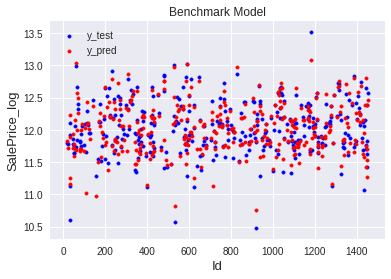

In [0]:
# Benchmark Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(x = X_test['Id'], y = y_test, s=12, c='b', label='y_test')
ax.scatter(x = X_test['Id'], y = y_pred, s=12, c='r', label='y_pred')
plt.legend(loc='upper left')
plt.xlabel('Id', fontsize=13)
plt.ylabel('SalePrice_log', fontsize=13)
plt.title('Benchmark Model')
plt.show()

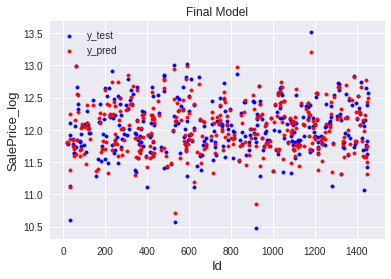

In [0]:
# Final Model
regressor = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=None, selection='cyclic', tol=0.001, warm_start=False)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(x = X_test['Id'], y = y_test, s=12, c='b', label='y_test')
ax.scatter(x = X_test['Id'], y = y_pred, s=12, c='r', label='y_pred')
plt.legend(loc='upper left')
plt.xlabel('Id', fontsize=13)
plt.ylabel('SalePrice_log', fontsize=13)
plt.title('Final Model')
plt.show()

In [0]:
lr = LinearRegression()

fig, ax = plt.subplots()
ax.scatter(x = X_test['Id'], y = y_test, s=12, c='b', label='y_test')
ax.scatter(x = X_test['Id'], y = y_pred, s=12, c='r', label='y_pred')
plt.legend(loc='upper left')
plt.xlabel('Id', fontsize=13)
plt.ylabel('SalePrice_log', fontsize=13)
plt.title('Final Model')
plt.show()

Ref)
https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner <br>
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard <br>
https://www.kaggle.com/dgawlik/house-prices-eda (자세히 읽진 않았지만 좋아보임.) <br>

